In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
imgs=[]
for i in range(5):
  img = cv2.imread(f'/content/Youssef{i+1}.jpg', 0)
  imgs.append(img)
for i in range(5):
  print(imgs[i].shape)
img = cv2.imread(f'/content/Komy.jpg', 0)
print(img.shape)

(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(3264, 2448)


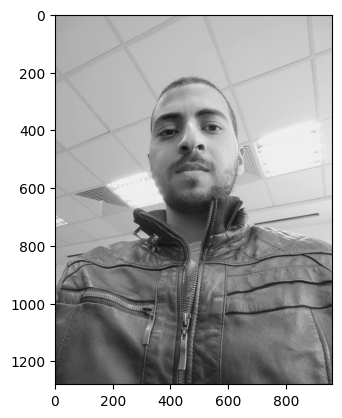

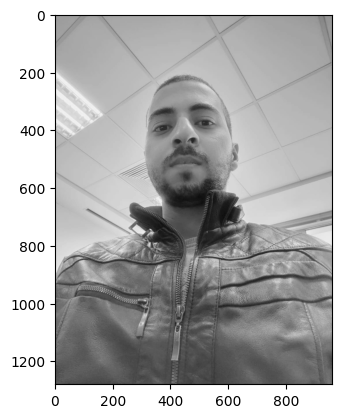

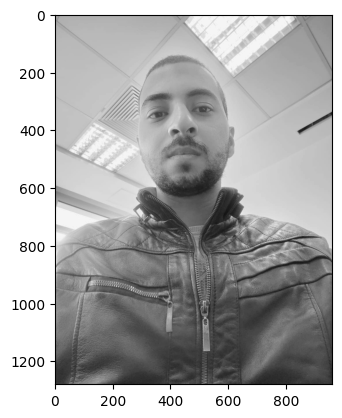

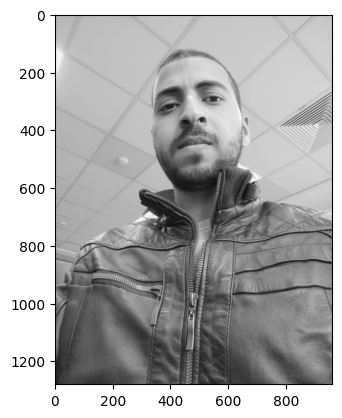

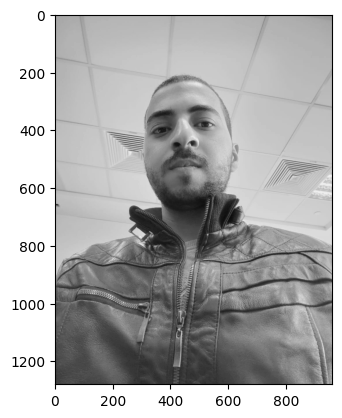

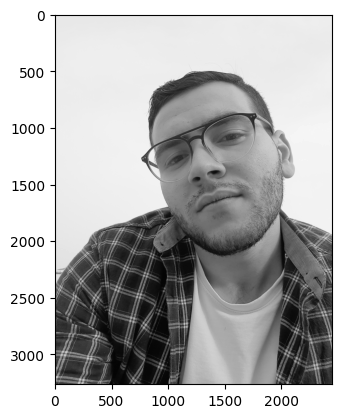

In [27]:
for i in range(5):
  plt.imshow(imgs[i],cmap='gray')
  plt.show()
plt.imshow(img,cmap='gray')
plt.show()

In [28]:
#Resize image
img = cv2.resize(img, (960, 1280))
img.shape

(1280, 960)

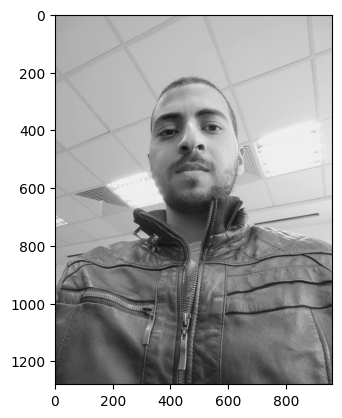

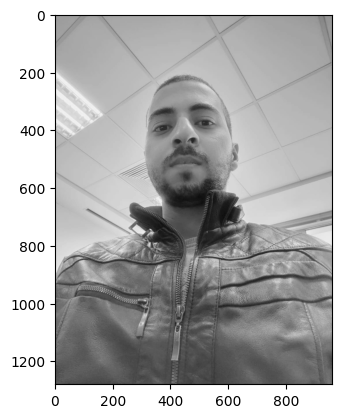

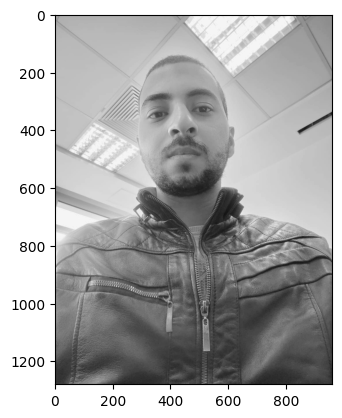

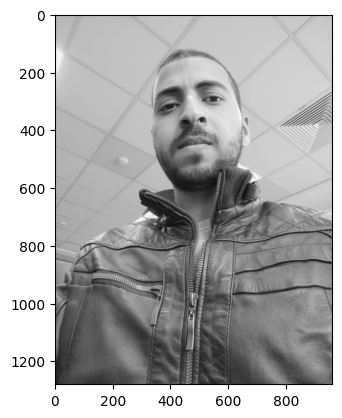

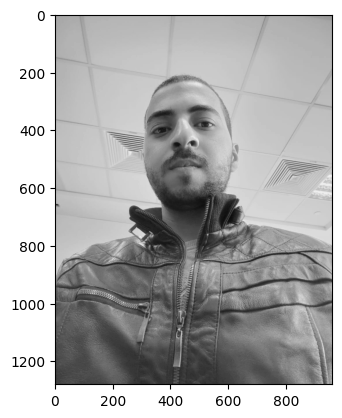

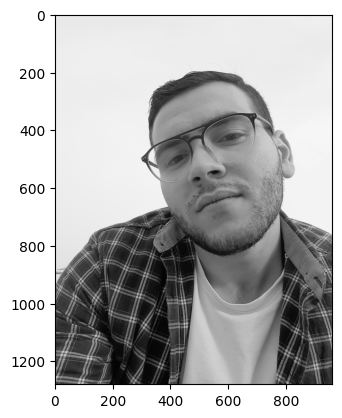

In [29]:
for i in range(5):
  plt.imshow(imgs[i],cmap='gray')
  plt.show()
plt.imshow(img,cmap='gray')
plt.show()

In [30]:
imgs.append(img)
for i in range(6):
  print(imgs[i].shape)

(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)


In [31]:
# flatten images
imgs_flat = [img.flatten() for img in imgs]

In [32]:
imgs_flat[3].shape

(1228800,)

In [33]:
# Calc Cosine Similarity between images
similarities = []
for i in range(len(imgs_flat)):
    for j in range(i + 1, len(imgs_flat)):
        similarity = cosine_similarity([imgs_flat[i]], [imgs_flat[j]])
        similarities.append((i, j, similarity[0][0]))
        print(f"Cosine similarity between image {i} and image {j}: {similarity[0][0]}")

Cosine similarity between image 0 and image 1: 0.9770984551577574
Cosine similarity between image 0 and image 2: 0.9721041446859191
Cosine similarity between image 0 and image 3: 0.9627044726410163
Cosine similarity between image 0 and image 4: 0.9820015705219793
Cosine similarity between image 0 and image 5: 0.9334608377732165
Cosine similarity between image 1 and image 2: 0.9817783690305865
Cosine similarity between image 1 and image 3: 0.9646558878244811
Cosine similarity between image 1 and image 4: 0.9867039308982417
Cosine similarity between image 1 and image 5: 0.9246451545479363
Cosine similarity between image 2 and image 3: 0.967837723380428
Cosine similarity between image 2 and image 4: 0.9756754309807754
Cosine similarity between image 2 and image 5: 0.9326504490993464
Cosine similarity between image 3 and image 4: 0.9625405567933814
Cosine similarity between image 3 and image 5: 0.9277562067040039
Cosine similarity between image 4 and image 5: 0.9280707432335229


In [34]:
# prompt: use another methods to calc similarity

import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# ... (Your existing code for image loading and resizing)

# flatten images
imgs_flat = [img.flatten() for img in imgs]

# Calc Cosine Similarity and Euclidean Distance between images
similarities_cosine = []
similarities_euclidean = []

for i in range(len(imgs_flat)):
    for j in range(i + 1, len(imgs_flat)):
        # Cosine Similarity
        similarity_cosine = cosine_similarity([imgs_flat[i]], [imgs_flat[j]])
        similarities_cosine.append((i, j, similarity_cosine[0][0]))
        print(f"Cosine similarity between image {i} and image {j}: {similarity_cosine[0][0]}")

        # Euclidean Distance
        # Note: Smaller Euclidean distance indicates higher similarity
        similarity_euclidean = euclidean_distances([imgs_flat[i]], [imgs_flat[j]])
        similarities_euclidean.append((i,j, similarity_euclidean[0][0]))
        print(f"Euclidean distance between image {i} and image {j}: {similarity_euclidean[0][0]}")

Cosine similarity between image 0 and image 1: 0.9770984551577574
Euclidean distance between image 0 and image 1: 39401.88728982407
Cosine similarity between image 0 and image 2: 0.9721041446859191
Euclidean distance between image 0 and image 2: 42248.831593311545
Cosine similarity between image 0 and image 3: 0.9627044726410163
Euclidean distance between image 0 and image 3: 48307.57973651754
Cosine similarity between image 0 and image 4: 0.9820015705219793
Euclidean distance between image 0 and image 4: 33922.716960762446
Cosine similarity between image 0 and image 5: 0.9334608377732165
Euclidean distance between image 0 and image 5: 69292.30092874677
Cosine similarity between image 1 and image 2: 0.9817783690305865
Euclidean distance between image 1 and image 2: 35151.84881339814
Cosine similarity between image 1 and image 3: 0.9646558878244811
Euclidean distance between image 1 and image 3: 49981.58226787143
Cosine similarity between image 1 and image 4: 0.9867039308982417
Euclidea

In [35]:
# I will use Euclidean distance with threshold 50000
# if distance less 50000 then face is True else face is False
# Calc Average distance between first five images in imgs
total_distance = 0
for i in range(5):
    for j in range(i + 1, 5):
        similarity_euclidean = euclidean_distances([imgs_flat[i]], [imgs_flat[j]])
        total_distance += similarity_euclidean[0][0]
average_distance = total_distance / 10
print(f"Average Euclidean distance between first five images: {average_distance}")

Average Euclidean distance between first five images: 41345.876794520125


In [41]:
# upload new image then calc average between the new image and first five images in imgs
img = cv2.imread(f'/content/jana.jpg', 0)
img = cv2.resize(img, (960, 1280))
img_flat = img.flatten()
total_distance = 0
for i in range(5):
    similarity_euclidean = euclidean_distances([img_flat], [imgs_flat[i]])
    total_distance += similarity_euclidean[0][0]
    print(f"Euclidean distance between new image and image {i}: {similarity_euclidean[0][0]}")
average_distance_with_new_image = total_distance / 5
print(f"Average Euclidean distance between new image and first five images: {average_distance_with_new_image}")
if (average_distance_with_new_image-average_distance) < 15000:
  print("Face is True")
else:
  print("Face is False")

Euclidean distance between new image and image 0: 67958.74438951914
Euclidean distance between new image and image 1: 50303.67476636275
Euclidean distance between new image and image 2: 59419.6729543339
Euclidean distance between new image and image 3: 71504.22119707339
Euclidean distance between new image and image 4: 61323.246448634796
Average Euclidean distance between new image and first five images: 62101.9119511848
Face is False


In [53]:
# prompt: # upload new image then calc average between the new image and first five images in imgs
# img = cv2.imread(f'/content/jana.jpg', 0)
# img = cv2.resize(img, (960, 1280))
# img_flat = img.flatten()
# total_distance = 0
# for i in range(5):
#     similarity_euclidean = euclidean_distances([img_flat], [imgs_flat[i]])
#     total_distance += similarity_euclidean[0][0]
#     print(f"Euclidean distance between new image and image {i}: {similarity_euclidean[0][0]}")
# average_distance_with_new_image = total_distance / 5
# print(f"Average Euclidean distance between new image and first five images: {average_distance_with_new_image}")
# if (average_distance_with_new_image-average_distance) < 15000:
#   print("Face is True")
# else:
#   print("Face is False"): I want to choose the method if cosine or Euclidean

# ... (Your existing code for image loading, resizing, and flattening)

# Choose the distance metric (cosine or euclidean)
distance_metric = "euclidean"  # Change to "cosine" if needed

# Calc Average distance between first five images in imgs
total_distance = 0
for i in range(5):
    for j in range(i + 1, 5):
        if distance_metric == "euclidean":
            similarity = euclidean_distances([imgs_flat[i]], [imgs_flat[j]])
        elif distance_metric == "cosine":
            similarity =cosine_similarity([imgs_flat[i]], [imgs_flat[j]]) # 1-cosine for distance
        else:
            raise ValueError("Invalid distance metric. Choose 'euclidean' or 'cosine'.")
        total_distance += similarity[0][0]
average_distance = total_distance / 10
print(f"Average {distance_metric} distance between first five images: {average_distance}")

# Upload new image then calc average between the new image and first five images in imgs
img = cv2.imread(f'/content/True.jpg', 0)
img = cv2.resize(img, (960, 1280))
img_flat = img.flatten()
total_distance = 0
for i in range(5):
    if distance_metric == "euclidean":
        similarity = euclidean_distances([img_flat], [imgs_flat[i]])
    elif distance_metric == "cosine":
        similarity = cosine_similarity([img_flat], [imgs_flat[i]]) # 1-cosine for distance
    else:
        raise ValueError("Invalid distance metric. Choose 'euclidean' or 'cosine'.")
    total_distance += similarity[0][0]
    print(f"{distance_metric} distance between new image and image {i}: {similarity[0][0]}")

average_distance_with_new_image = total_distance / 5
print(f"Average {distance_metric} distance between new image and first five images: {average_distance_with_new_image}")

# Determine the threshold based on the chosen metric
if distance_metric == "euclidean":
    threshold = 15000
elif distance_metric == "cosine":
    threshold = 0.02 # Example threshold for cosine similarity (adjust as needed)

if abs(average_distance_with_new_image - average_distance) < threshold:
    print("Face is True")
else:
    print("Face is False")

Average euclidean distance between first five images: 41345.876794520125
euclidean distance between new image and image 0: 52532.45034262156
euclidean distance between new image and image 1: 41633.5109857432
euclidean distance between new image and image 2: 44888.043909263855
euclidean distance between new image and image 3: 61022.604885402914
euclidean distance between new image and image 4: 48885.721381605894
Average euclidean distance between new image and first five images: 49792.46630092749
Face is True
